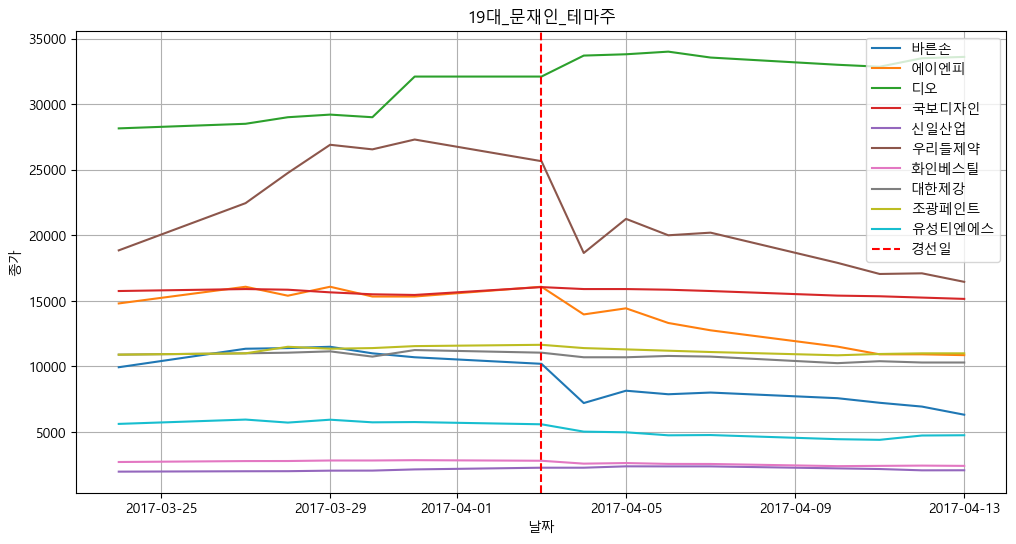

In [2]:
############################ 이 부분에 n번째 대통령 선거 코드를 복붙해주시면 됩니다 ############################################


import FinanceDataReader as fdr
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import matplotlib as mpl
warnings.filterwarnings('ignore')
mpl.rc('font', family='Malgun Gothic')  
mpl.rcParams['axes.unicode_minus'] = False

start_date = '2017-03-24' #경선확정일 - 10
end_date = '2017-04-13' #경선확정일 + 10

thema1 = fdr.DataReader('018700', start=start_date, end=end_date) #테마주1
thema2 = fdr.DataReader('015260', start=start_date, end=end_date) #테마주2  테마를 추가하고싶으면 아래에 이어서 적으시면됩니다.# thema2 = fdr.DataReader('015260', start=start_date, end=end_date) 
thema3 = fdr.DataReader('039840', start=start_date, end=end_date)
thema4 = fdr.DataReader('066620', start=start_date, end=end_date)
thema5 = fdr.DataReader('002700', start=start_date, end=end_date)
thema6 = fdr.DataReader('004720', start=start_date, end=end_date)
thema7 = fdr.DataReader('133820', start=start_date, end=end_date)
thema8 = fdr.DataReader('084010', start=start_date, end=end_date)
thema9 = fdr.DataReader('004910', start=start_date, end=end_date)
thema10 = fdr.DataReader('024800', start=start_date, end=end_date)


thema= pd.DataFrame()

thema['thema1'] = thema1['Close']
thema['thema2'] = thema2['Close']
thema['thema3'] = thema3['Close']
thema['thema4'] = thema4['Close']
thema['thema5'] = thema5['Close']
thema['thema6'] = thema6['Close']
thema['thema7'] = thema7['Close']
thema['thema8'] = thema8['Close']
thema['thema9'] = thema9['Close']
thema['thema10'] = thema10['Close']
#(1)에 추가했을 경우 이 부분도 추가해주세요


plt.figure(figsize=(12, 6))
plt.plot(thema.index, thema['thema1'], label='바른손')
plt.plot(thema.index, thema['thema2'], label='에이엔피')
plt.plot(thema.index, thema['thema3'], label='디오')
plt.plot(thema.index, thema['thema4'], label='국보디자인')
plt.plot(thema.index, thema['thema5'], label='신일산업')
plt.plot(thema.index, thema['thema6'], label='우리들제약')
plt.plot(thema.index, thema['thema7'], label='화인베스틸')
plt.plot(thema.index, thema['thema8'], label='대한제강')
plt.plot(thema.index, thema['thema9'], label='조광페인트')
plt.plot(thema.index, thema['thema10'], label='유성티엔에스')
#(1)에 추가했을 경우 이 부분도 추가해주세요

#경선 일에 빨간 점선 줄
plt.axvline(x=pd.to_datetime('2017-04-03'), color='red', linestyle='--', label='경선일') #경선일을 수정하려면 datatime변수 수정해주시면 됩니다.

plt.xlabel('날짜')
plt.ylabel('종가')
plt.title('19대_문재인_테마주')
plt.legend()
plt.grid(True)
plt.show()

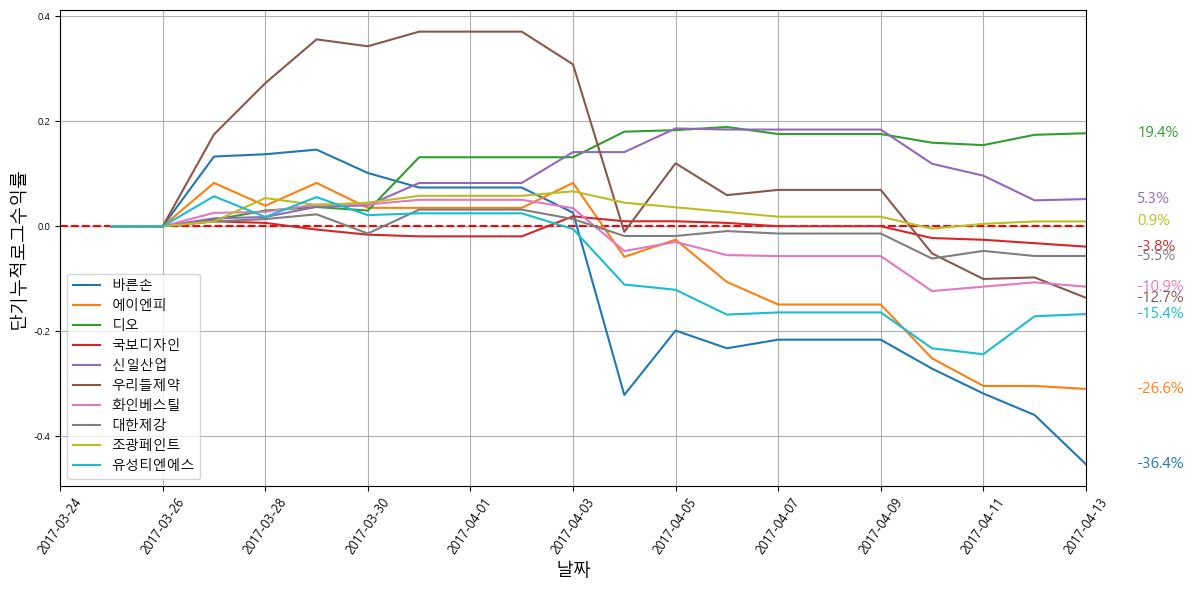

In [21]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

# 누적 로그 수익률 계산
daily = thema.resample('d').last()
d_df = daily.pct_change()
daily_log_returns = d_df.apply(lambda x: np.log(1 + x)).cumsum() #로그 누적 수익률

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.axhline(y=0.0, color='red', linestyle='--')  # 수익률 0 기준선

# 종목 컬럼과 라벨
columns = ['thema1', 'thema2', 'thema3', 'thema4', 'thema5','thema6', 'thema7', 'thema8', 'thema9', 'thema10']
labels = ['바른손', '에이엔피', '디오', '국보디자인', '신일산업','우리들제약', '화인베스틸', '대한제강', '조광페인트', '유성티엔에스']  # 이 부분 수정해주세요.
colors = plt.cm.tab10.colors

for i, (col, label) in enumerate(zip(columns, labels)):
    plt.plot(daily_log_returns.index, daily_log_returns[col], label=label, color=colors[i % 10])

    last_date = daily_log_returns.index[-1]
    log_return = daily_log_returns[col].iloc[-1]
    normal_return = np.exp(log_return) - 1  # 로그 수익률을 보기 쉽게 다시 일반수익률로 

    plt.text(last_date + pd.Timedelta(days=1),  
             log_return,
             f'{normal_return * 100:.1f}%',   
             fontsize=11,
             va='center',
             ha='left',
             color=colors[i % 10])
    
plt.xlim(daily_log_returns.index[0], daily_log_returns.index[-1]) 

plt.xticks(fontsize=9, rotation=55)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2)) #몇 일 간격으로 y축에 날짜가 나오게 할지 , 장기의 경우 8일 정도로 하면 좋을듯 합니다.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.yticks(fontsize=7)

plt.xlabel('날짜', fontsize=13)
plt.ylabel('단기누적로그수익률', fontsize=13)
plt.legend(fontsize=10)
plt.grid(True)

plt.tight_layout()
plt.show()
